In [14]:
# Install pip packages in the current Jupyter kernel
# Uncomment if needed

# import sys
# !{sys.executable} -m pip install --quiet --upgrade pip 
# !{sys.executable} -m pip install --quiet tensorflow 
# !{sys.executable} -m pip install --quiet matplotlib
# !{sys.executable} -m pip install --quiet scikit-learn
# !{sys.executable} -m pip install --quiet seaborn

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the model from the disk

In [4]:
MODEL_VERSION = 7
model = tf.keras.models.load_model(f'./saved-models/models/{MODEL_VERSION}')

2024-08-26 12:08:13.749270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-26 12:08:13.780648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-26 12:08:13.780998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-26 12:08:13.783406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-26 12:08:13.783731: I tensorflow/compile

# Constants and data

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3  # The RGB channels
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE    
)
dataset

Found 2152 files belonging to 3 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
len(list(dataset))

68

In [8]:
total_images = 0

for images, labels in dataset:
    total_images += images.shape[0]

print(f"Total number of images in the dataset: {total_images}")

Total number of images in the dataset: 2152


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Let's find the wrong predictions

In [10]:
wrong_predictions = []

# We check in the whole dataset
j = 1
print("Batches:")
for images, labels in dataset.take(-1):
    # Predict a batch
    predictions = model.predict(images.numpy(), verbose=0)
    print(j, end=".. ") 
    j += 1

    for label, prediction, image in zip(labels, predictions, images):
        predicted_label = np.argmax(prediction)
        if predicted_label != label:
            wrong_predictions.append((image, class_names[label], class_names[predicted_label], round(100 * prediction[predicted_label], 2))) 

num_wrongs = len(wrong_predictions)
lines = int(np.ceil(num_wrongs / 3))
print("\n\n", num_wrongs, "wrong predictions out of", total_images, "images")

Batches:


2024-08-26 12:08:16.665643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600


1.. 2.. 3.. 4.. 5.. 6.. 7.. 8.. 9.. 10.. 11.. 12.. 13.. 14.. 15.. 16.. 17.. 18.. 19.. 20.. 21.. 22.. 23.. 24.. 25.. 26.. 27.. 28.. 29.. 30.. 31.. 32.. 33.. 34.. 35.. 36.. 37.. 38.. 39.. 40.. 41.. 42.. 43.. 44.. 45.. 46.. 47.. 48.. 49.. 50.. 51.. 52.. 53.. 54.. 55.. 56.. 57.. 58.. 59.. 60.. 61.. 62.. 63.. 64.. 65.. 66.. 67.. 68.. 

 13 wrong predictions out of 2152 images


In [11]:
## Let's visualize the images where the predictions were wrong

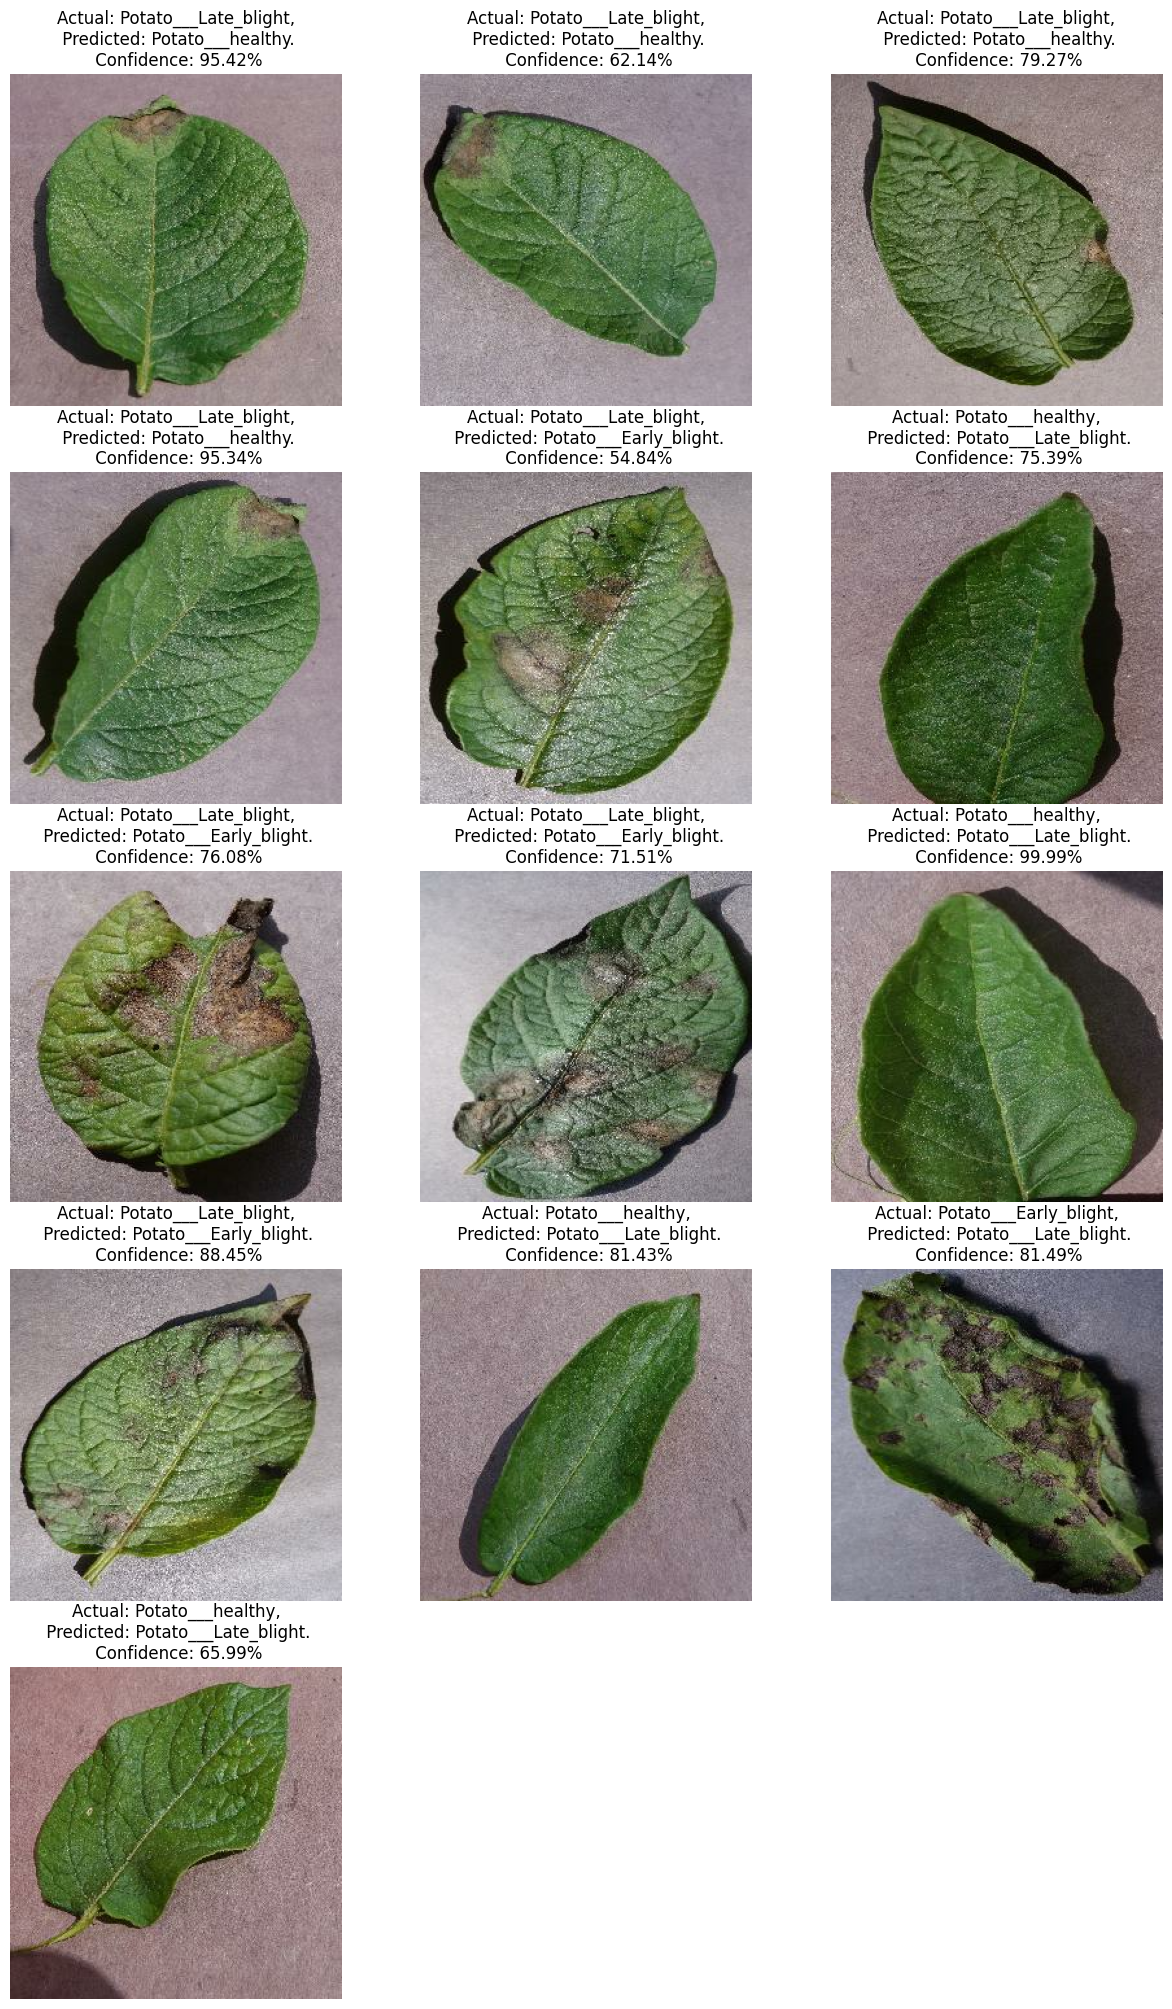

In [12]:
# Comment only to save space on GitHub
# Uncomment if needed

plt.figure(figsize=(15, 5 * lines))
for i in range(num_wrongs):
    ax = plt.subplot(lines, 3, i + 1)

    image, actual_class, predicted_class, confidence = wrong_predictions[i]
    plt.imshow(image.numpy().astype("uint8"))
    
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    
    plt.axis("off")

In [13]:
# Step 1: Get the true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Step 2: Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

1/1 [==============================] - 0s 20ms/step


Text(95.72222222222221, 0.5, 'Truth')

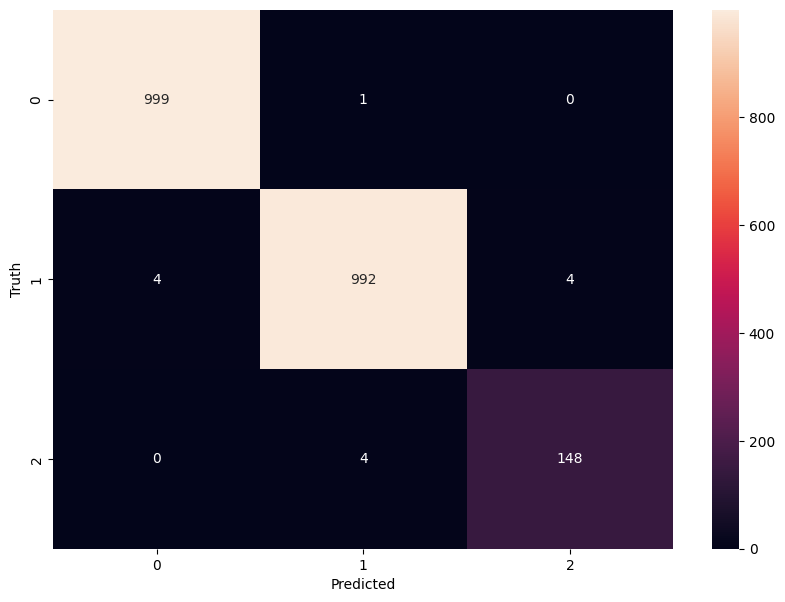

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      0.99      0.99      1000
           2       0.97      0.97      0.97       152

    accuracy                           0.99      2152
   macro avg       0.99      0.99      0.99      2152
weighted avg       0.99      0.99      0.99      2152

